# Spectrum

In a previous lecture, we learned how to plot time series of tide gauge data. We found a rich content, at different periods: tidal oscillations at 12 and 24 hours, yearly variations corresponding to seasons, and if plotting multi-year data, some gauges show variations due to El Nino and global warming. 

Clearly, tools are needed to separate such processes happening at vastly different time scales. This is what spectrum analysis is about. 

We will begin with playing with the most intuitive time series: sound files (run cell below score and then click play button to listen)

<img src="../images/twinkle.png" style="width: 800px">

In [1]:
from IPython.display import Audio
Audio('../ocn463-data/sound/twinkle.wav')

ValueError: rate must be specified when data is a numpy array or list of audio samples.

This "audio" file (downloaded from YouTube) was obtained by feeding the signal of a microphone to an Analog-to-Digital converter (ADC). It is perhaps the most common time series, used in music CD. Each sample is 16 bits (from -32768 to +32767), and standard sampling is 44100 samples/seconds. 

Load the .wav file using Scipy.io's submodule wavfile: 

In [2]:
# read .wav file with sample rate FS and audio data y
import scipy.io.wavfile as wavread

FS, y = wavread.read('../../ocn463-data/sound/twinkle.wav')

In [3]:
# read a .wav file information: (!) allows you to get out of matlab to linux for one line
!file ../../ocn463-data/sound/twinkle.wav

../../ocn463-data/sound/twinkle.wav: RIFF (little-endian) data, WAVE audio, Microsoft PCM, 16 bit, mono 44100 Hz


In [5]:
whos

Variable   Type       Data/Info
-------------------------------
Audio      type       <class 'IPython.lib.display.Audio'>
FS         int        44100
wavread    module     <module 'scipy.io.wavfile<...>ges/scipy/io/wavfile.py'>
y          ndarray    1754568: 1754568 elems, type `int16`, 3509136 bytes (3.3465728759765625 Mb)


Note that the datatype of y is 'int16'; this is because there are 16 bits per sample in the audio file. Check the web documents for scipy.io.wavfile.read to see what happens with other data types.

However, we need our data to be in type float for further computations, so we need to convert it:

In [3]:
y = y.astype(float)

Let's plot the time series: 

Text(0, 0.5, 'amplitude')

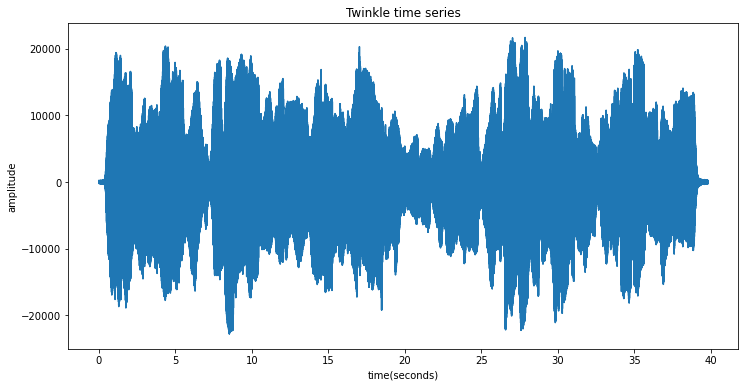

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# plot with an x-axis in seconds
fig, ax = plt.subplots(figsize=(12,6))
ax.plot(np.arange(0,len(y))/FS, y)
ax.set_title('Twinkle time series')
ax.set_xlabel('time(seconds)')
ax.set_ylabel('amplitude')

Let's zoom on it (1 second): 

(3.0, 4.0)

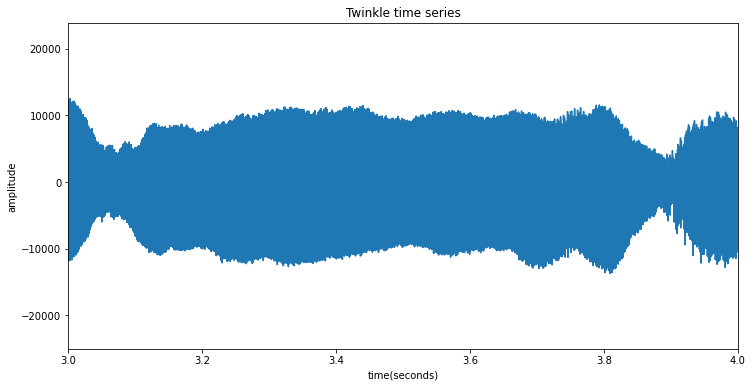

In [5]:
fig, ax = plt.subplots(figsize=(12,6))
ax.plot(np.arange(0,len(y))/FS, y)
ax.set_title('Twinkle time series')
ax.set_xlabel('time(seconds)')
ax.set_ylabel('amplitude')
ax.set_xlim(left=3, right=4)

and again (1/100 second) 

(3.0, 3.01)

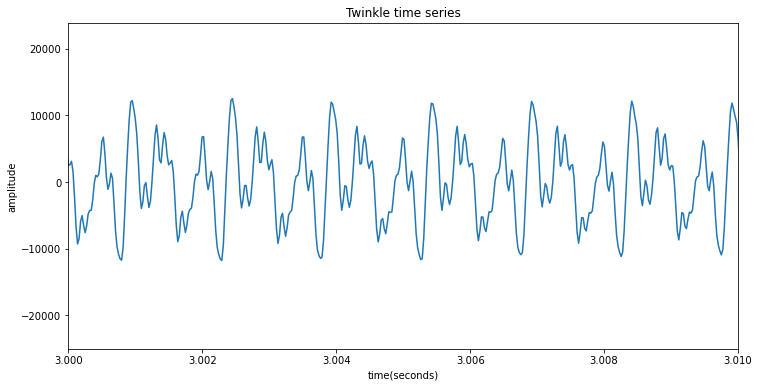

In [6]:
fig, ax = plt.subplots(figsize=(12,6))
ax.plot(np.arange(0,len(y),1)/FS, y)
ax.set_title('Twinkle time series')
ax.set_xlabel('time(seconds)')
ax.set_ylabel('amplitude')
ax.set_xlim(left=3, right=3.01)

Visually, it is very similar to a plots of tide gauge time series: variations over long periods, short period oscillations. However, when listening, our brain is doing more than decoding the time series: it identifies easily the contents of the score, telling an A from an F. This is the objective of spectrum analysis. 

We will skip the theory, and take an empirical approach using matlab functions. First, we will plot what is called the spectrogram: 

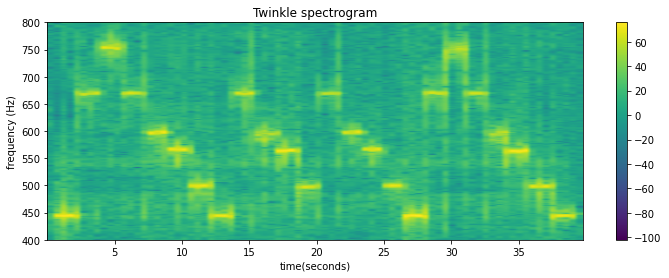

In [7]:
# limit to frequency range of music, A440 to A880 in y-axis
fig, ax = plt.subplots(figsize=(12,4))
spectgram, freqs, bins, image = ax.specgram(y, NFFT=int(FS/2), Fs=FS, mode='magnitude')
ax.set_ylim(bottom=400, top=800)
ax.set_xlabel('time(seconds)')
ax.set_ylabel('frequency (Hz)')
ax.set_title('Twinkle spectrogram')
plt.colorbar(image, ax=ax);

<img src="../images/twinkle.png" style="width: 560px;"/>

The score is simply a transcription of the spectrum for the musician, with A=440 Hz. Music for humans is recorded through its spectrogram, not its time series, because the human ear is a spectrum analyzer, not a time-series sampler. Applying spectrum techniques to any time series (like sea level) is therefore a powerful tool to enhance our understanding of their frequency content. 

The spectrogram tells us more than the score, however. Its frequency ranges from 0 to FS/2, half the sampling frequency (the CD sampling frequency was chosen at >40 kHz because the human ear goes to 20 kHz). Change the scale: 

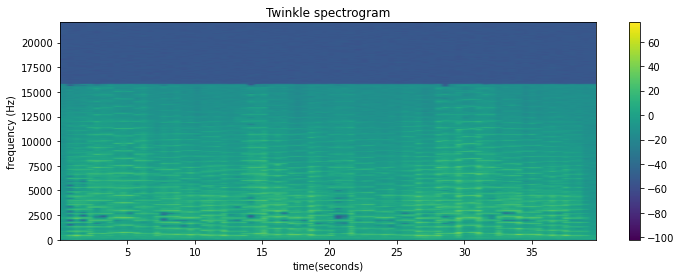

In [9]:
# expand the frequency range from 0 Hz to 10000 Hz
fig, ax = plt.subplots(figsize=(12,4))
spectgram, freqs, bins, image = ax.specgram(y, NFFT=int(FS/2), Fs=FS, mode='magnitude')
ax.set_ylim(bottom=0, top=22050)
ax.set_xlabel('time(seconds)')
ax.set_ylabel('frequency (Hz)')
ax.set_title('Twinkle spectrogram')

plt.colorbar(image, ax=ax)

The "fundamental" sounds between 400 and 800 Hz, are replicated as part of the melody, to much higher frequencies, at 2*f, 3*f, ... n*f. These are called the "harmonics" of the fundamentals, and their relative strength is what makes a sound specific to an instrument (i.e. its tone or timbre). 

There is an important compromise to make when using spectrogram: the spectral resolution dF (the vertical axis) and the temporal resolution dT (the horizontal axis) are linked. Require a higher spectral resolution, you will loose in temporal resolution, and vice-versa. The spectral and temporal resolutions are linked with dT*dF=1. Let's experiment with this. In the original spectrogram, we chose to have a temporal resolution using FS/2 samples, thus of 1/2 second. The frequency resolution was thus 2 Hz. Convince yourself by doing: 

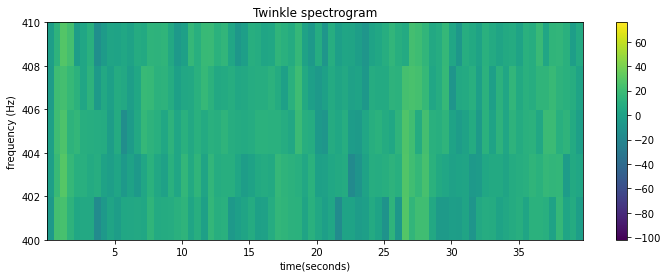

In [10]:
# narrow the frequency range from 400 Hz to 410 Hz
fig, ax = plt.subplots(figsize=(12,4))
spectgram, freqs, bins, image = ax.specgram(y, NFFT=int(FS/2), Fs=FS, mode='magnitude')
ax.set_ylim(bottom=400, top=410)
ax.set_xlabel('time(seconds)')
ax.set_ylabel('frequency (Hz)')
ax.set_title('Twinkle spectrogram')
plt.colorbar(image, ax=ax)

Let's try a shorter averaging time of 0.05 seconds using FS/20 samples each: 

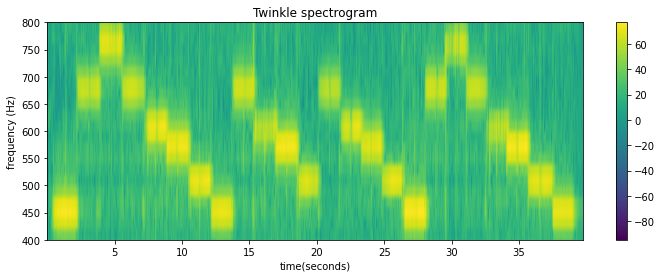

In [11]:
# limit to frequency range of music, A440 to A880 in y-axis
# use shorter averaging times
fig, ax = plt.subplots(figsize=(12,4))
spectgram, freqs, bins, image = ax.specgram(y, NFFT=int(FS/20), Fs=FS, mode='magnitude')
ax.set_ylim(bottom=400, top=800)
ax.set_xlabel('time(seconds)')
ax.set_ylabel('frequency (Hz)')
ax.set_title('Twinkle spectrogram')
plt.colorbar(image, ax=ax)

The temporal resolution is now very fine, but the gain is mitigated by a much coarser frequency resolution of 20 Hz, as you can see with: 

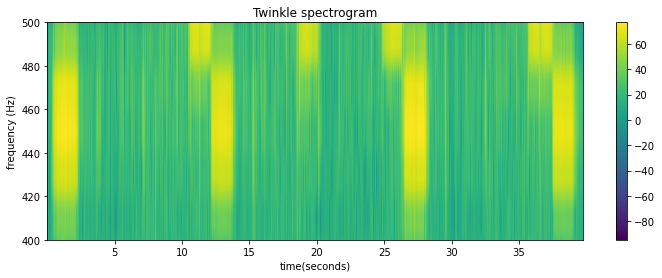

In [12]:
# narrow frequency range from 400 Hz to 500 Hz
# use shorter averaging times
fig, ax = plt.subplots(figsize=(12,4))
spectgram, freqs, bins, image = ax.specgram(y, NFFT=int(FS/20), Fs=FS, mode='magnitude')
ax.set_ylim(bottom=400, top=500)
ax.set_xlabel('time(seconds)')
ax.set_ylabel('frequency (Hz)')
ax.set_title('Twinkle spectrogram')
plt.colorbar(image, ax=ax)

Likewise, if we take a longer averaging time of 5 seconds using 5*FS samples each: 

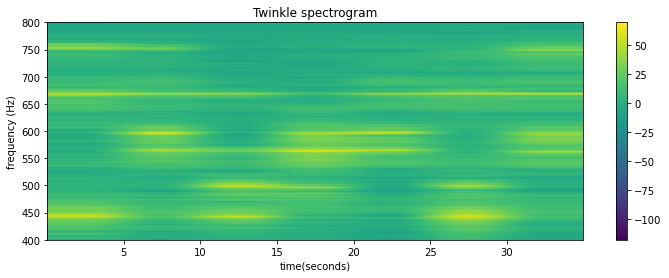

In [13]:
# limit to frequency range of music, A440 to A880 in y-axis
# use longer averaging times
fig, ax = plt.subplots(figsize=(12,4))
spectgram, freqs, bins, image = ax.specgram(y, NFFT=int(5*FS), Fs=FS, mode='magnitude')
ax.set_ylim(bottom=400, top=800)
ax.set_xlabel('time(seconds)')
ax.set_ylabel('frequency (Hz)')
ax.set_title('Twinkle spectrogram')
plt.colorbar(image, ax=ax)

The frequency resolution is now very fine, but the temporal resolution almost useless for the process that we are studying - we cannot distinguish individual notes: 

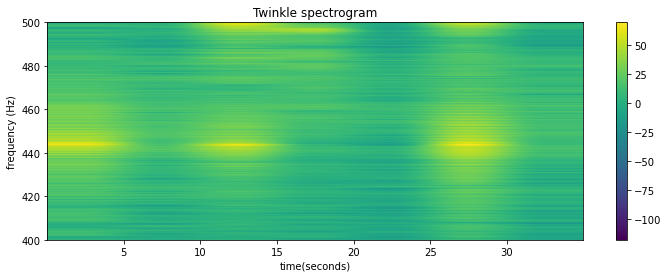

In [14]:
# narrow the frequency range
# use longer averaging times
fig, ax = plt.subplots(figsize=(12,4))
spectgram, freqs, bins, image = ax.specgram(y, NFFT=int(5*FS), Fs=FS, mode='magnitude')
ax.set_ylim(bottom=400, top=500)
ax.set_xlabel('time(seconds)')
ax.set_ylabel('frequency (Hz)')
ax.set_title('Twinkle spectrogram')
plt.colorbar(image, ax=ax)

The choice of temporal vs. spectral resolution depends on what you want to analyze. Sometimes for process with fast temporal changes, you may need to sacrifice spectral resolution. At the other end, stationary processed that do not change in time (except for the sinusoidal variations of their components) do not require temporal resolution. At this extreme, the interest is in the highest spectral resolution possible. So let's compute the spectrogram using the entire length of the record: 

/tmp/ipykernel_15517/2994423575.py:4: UserWarning: Only one segment is calculated since parameter NFFT (=1754568) >= signal length (=1754568).
  spectgram, freqs, bins, image = ax.specgram(y, NFFT=int(len(y)), Fs=FS, mode='magnitude')


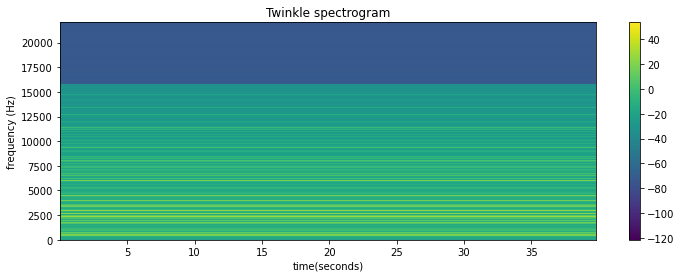

In [15]:
# use longest averaging time
# do not limit frequency space
fig, ax = plt.subplots(figsize=(12,4))
spectgram, freqs, bins, image = ax.specgram(y, NFFT=int(len(y)), Fs=FS, mode='magnitude')
ax.set_xlabel('time(seconds)')
ax.set_ylabel('frequency (Hz)')
ax.set_title('Twinkle spectrogram')
plt.colorbar(image, ax=ax);

As a forensic analyst, you notice that while the file was uploaded to YouTube at the standard 44100 Hz sampling rate, its author actually initially sampled it at 32000 Hz, because there is no spectral content above 16 kHz... smile! 

There is now ultra-fine spectral resolution of about 0.025 Hz which is FS/1754568, as seen with: 

/tmp/ipykernel_15517/3411494338.py:4: UserWarning: Only one segment is calculated since parameter NFFT (=1754568) >= signal length (=1754568).
  spectgram, freqs, bins, image = ax.specgram(y, NFFT=int(len(y)), Fs=FS, mode='magnitude')


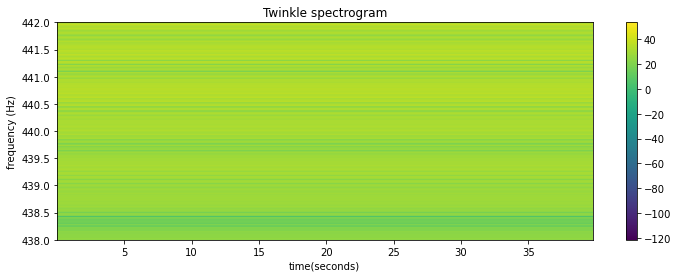

In [16]:
# use longest averaging time
# do not limit frequency space
fig, ax = plt.subplots(figsize=(12,4))
spectgram, freqs, bins, image = ax.specgram(y, NFFT=int(len(y)), Fs=FS, mode='magnitude')
ax.set_ylim(bottom=438, top=442)
ax.set_xlabel('time(seconds)')
ax.set_ylabel('frequency (Hz)')
ax.set_title('Twinkle spectrogram')
plt.colorbar(image, ax=ax)

Since in such plot there is no information at all in the x-axis, it is customary to plot the spectral data in a different way. The spectrogram is saved each time in the variable "spectgram" when we make the plot; the frequencies are saved in "freqs", and the central time of each bin is saved in "bins". 

This "spectgram" is the magnitude of the Fourier transform of the time series; the Fourier transform is an array of complex numbers. To plot it, we need to take the logarithm (because the scale of variations is very large) of the square: 

Text(0.5, 1.0, 'Twinkle power spectrum')

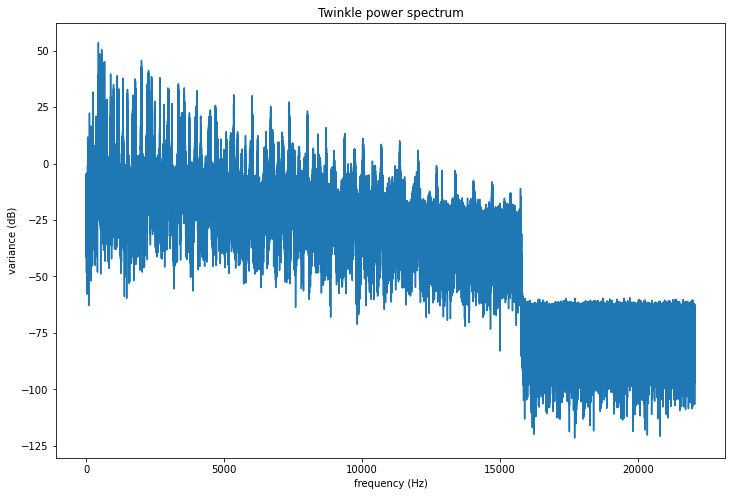

In [17]:
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(freqs, 10 * np.log10(spectgram[:,0]**2))
ax.set_xlabel('frequency (Hz)')
ax.set_ylabel('variance (dB)')
ax.set_title('Twinkle power spectrum')

It is customary to multiply the logarithm by 10, to obtain a unit call decibel. 

Another function that calculates a single magnitude spectrum is magnitude_spectrum:

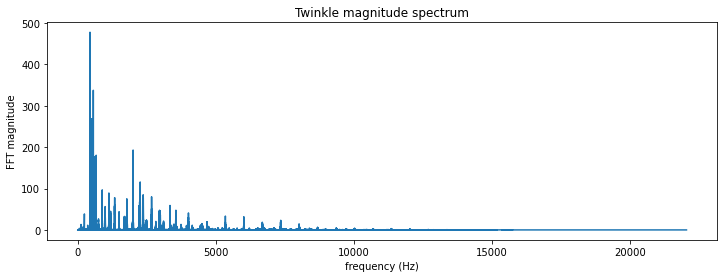

In [18]:
# do not limit frequency space
fig, ax = plt.subplots(figsize=(12,4))
spectrum, freqs, line = ax.magnitude_spectrum(y, Fs=FS)
#ax.set_ylim(bottom=400, top=402)
ax.set_ylabel('FFT magnitude')
ax.set_xlabel('frequency (Hz)')
ax.set_title('Twinkle magnitude spectrum');

It must also be converted to variance and dB:

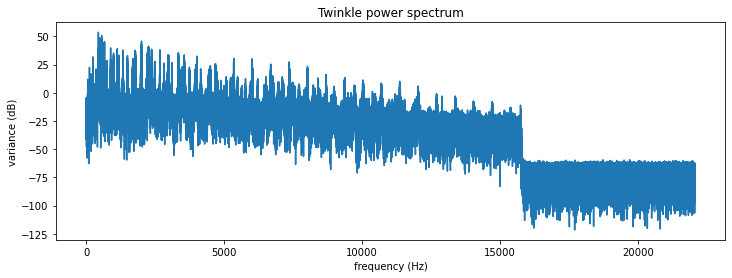

In [19]:
# do not limit frequency space
fig, ax = plt.subplots(figsize=(12,4))
ax.plot(freqs, 10*np.log10(spectrum**2))
ax.set_ylabel('variance (dB)')
ax.set_xlabel('frequency (Hz)')
ax.set_title('Twinkle power spectrum');

Let's scale to your useful fundamentals frequency band: 

(-60.0, 60.0)

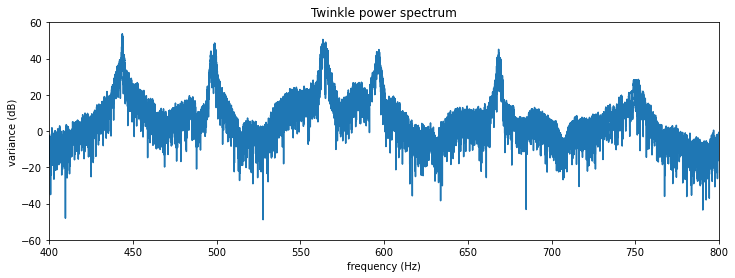

In [20]:
# zoom of useful frequencies
fig, ax = plt.subplots(figsize=(12,4))
ax.plot(freqs, 10*np.log10(spectrum**2))
ax.set_xlabel('frequency (Hz)')
ax.set_ylabel('variance (dB)')
ax.set_title('Twinkle power spectrum')
ax.set_xlim(left=400, right=800)
ax.set_ylim(bottom=-60, top=60)

Now you see the exact notes of the A-major scale played by the violonist: A-B-C#-D-E-F# (# means sharp in music notation), with A=440 Hz. A scale is built such that notes have frequencies in integer ratios, the simplest being E=3/2*A and C#=5/4*A. The notes are labeled in the plot below.

Text(750, 30, 'F#')

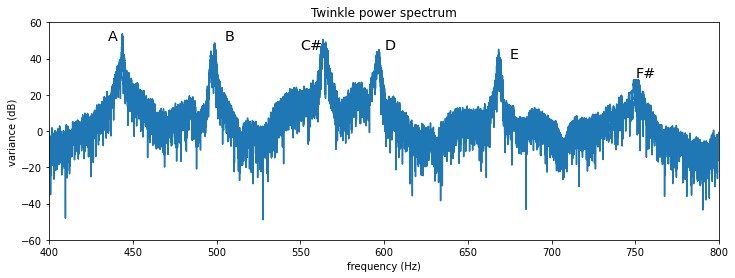

In [21]:
# same as before but with labels
fig, ax = plt.subplots(figsize=(12,4))
ax.plot(freqs, 10*np.log10(spectrum**2))
ax.set_xlabel('frequency (Hz)')
ax.set_ylabel('variance (dB)')
ax.set_title('Twinkle power spectrum')
ax.set_xlim(left=400, right=800)
ax.set_ylim(bottom=-60, top=60)
ax.text(435, 50, 'A', fontsize='x-large')
ax.text(505, 50, 'B', fontsize='x-large')
ax.text(550, 45, 'C#', fontsize='x-large')
ax.text(600, 45, 'D', fontsize='x-large')
ax.text(675, 40, 'E', fontsize='x-large')
ax.text(750, 30, 'F#', fontsize='x-large')

But you don't have anymore information on the temporal evolution of the score. By including higher frequencies in the plot: 

(-60.0, 60.0)

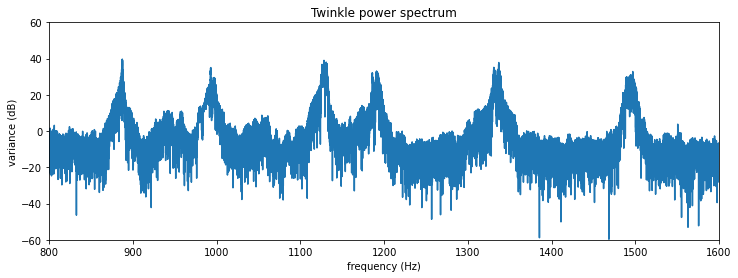

In [22]:
# expand frequencies
fig, ax = plt.subplots(figsize=(12,4))
ax.plot(freqs, 10*np.log10(spectrum**2))
ax.set_xlabel('frequency (Hz)')
ax.set_ylabel('variance (dB)')
ax.set_title('Twinkle power spectrum')
ax.set_xlim(left=800, right=1600)
ax.set_ylim(bottom=-60, top=60)

You can see all the harmonics that make the tone of the violin, again with no information on the temporal evolution of the score. 

Such spectrum techniques are extremely useful for analyzing natural sounds in the ocean, and especially to track marine mammals. An excellent collections of examples including time series and spectrograms is given here.

SOEST has their own observatory 100 km north of Oahu, called ACO, with hydrophones (underwater microphones) connected in real-time to the shore station by fiber optics cable.

Finally, I should mention that over the past few years, smart-phone apps that do all the spectral analysis have become widely available, some for free.

I recommend "Spectroid" and "Spectral view" under Android. You should install them, or equivalent ones, on your device, and analyze sounds of every day's life: cars, birds, water dropping from a faucet, anything. 